In [1]:
!pip install pandas numpy scipy matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#concrete data
df=pd.read_csv("Concrete_Data.csv")

In [4]:
print(df.columns)

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')


In [5]:
df.columns=["cement","slag","ash","water","splast","coarse","fine","age","strength"]

In [6]:
df.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.tail()

,cement,slag,ash,water,splast,coarse,fine,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cement    1030 non-null   float64
 1   slag      1030 non-null   float64
 2   ash       1030 non-null   float64
 3   water     1030 non-null   float64
 4   splast    1030 non-null   float64
 5   coarse    1030 non-null   float64
 6   fine      1030 non-null   float64
 7   age       1030 non-null   int64  
 8   strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
splast,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarse,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fine,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [14]:
df.isnull().sum()

cement      0
slag        0
ash         0
water       0
splast      0
coarse      0
fine        0
age         0
strength    0
dtype: int64

In [18]:
df.duplicated().sum()
duplicates=df[df.duplicated()]
print(duplicates)

     cement   slag  ash  water  splast  coarse   fine  age  strength
77    425.0  106.3  0.0  153.5    16.5   852.1  887.1    3     33.40
80    425.0  106.3  0.0  153.5    16.5   852.1  887.1    3     33.40
86    362.6  189.0  0.0  164.9    11.6   944.7  755.8    3     35.30
88    362.6  189.0  0.0  164.9    11.6   944.7  755.8    3     35.30
91    362.6  189.0  0.0  164.9    11.6   944.7  755.8    3     35.30
100   425.0  106.3  0.0  153.5    16.5   852.1  887.1    7     49.20
103   425.0  106.3  0.0  153.5    16.5   852.1  887.1    7     49.20
109   362.6  189.0  0.0  164.9    11.6   944.7  755.8    7     55.90
111   362.6  189.0  0.0  164.9    11.6   944.7  755.8    7     55.90
123   425.0  106.3  0.0  153.5    16.5   852.1  887.1   28     60.29
126   425.0  106.3  0.0  153.5    16.5   852.1  887.1   28     60.29
132   362.6  189.0  0.0  164.9    11.6   944.7  755.8   28     71.30
134   362.6  189.0  0.0  164.9    11.6   944.7  755.8   28     71.30
137   362.6  189.0  0.0  164.9    

In [20]:
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [22]:
number_of_samples,number_of_features=df.shape
print(number_of_samples,number_of_features)

1005 9


In [23]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
beta=np.zeros((number_of_features,1))

In [24]:
def feature_normalisation(X):
    #shape of X be m*n 
    #mean of all features
    mean=np.mean(X,axis=0)  #mean of every column, shape will be 1*n
    std=np.std(X,axis=0)  #standard deviation of all columns, shape is 1*n
    #normalise X, such that mean will be 0 and std deviation will be 1.
    X_normalised = (X-mean)/std

    return X_normalised,mean,std

In [25]:
X_normalised,mean_X,std_X=feature_normalisation(X)

In [66]:
#adding ones column now.

ones=np.ones((number_of_samples,1))
X=np.hstack([ones,X_normalised])
print(X.shape)
Y=Y.reshape(-1,1)
print(Y.shape)

(1005, 9)
(1005, 1)


In [67]:
def normal_equation(X,Y):
    """
    using normal eqaution Y=X*beta
    here beta is unknown

    X shape is (m,n+1)
    Y shape is (m,1)
    Beta shape is (n+1,1) and is unknown

    if the matrix is square matrix then we can invert and bring it to the other side. but the problem here is X is not a square matrix
    To convert into square matrix, multiply by XT on both sides
    => XT*Y=(XT*X)*beta

    XT shape is (n+1,m)
    XT*X shape is (m,m). now we can invert it.

    => inv(XT*X)*XT*Y=beta    #this is the desired equation...

    """
    XT=X.T
    XTX=XT @ X
    inv=np.linalg.inv(XTX)
    beta= inv @ XT @ Y
    return beta

In [68]:
beta=normal_equation(X,Y)

In [69]:
y_pred=X @ beta
print(y_pred)

[[53.27576238]
 [53.51092933]
 [56.31212137]
 ...
 [26.483843  ]
 [28.9047317 ]
 [31.93129573]]


In [70]:
ss_total=np.sum((Y-np.mean(Y))**2)
ss_res=np.sum((Y-y_pred)**2)
r_square=1-(ss_res/ss_total)
print("R Squre for Linear regression is", r_square)

R Squre for Linear regression is 0.6038823287824169


In [71]:
mae=np.mean(np.abs(Y-y_pred))

mse = np.mean((Y-y_pred)**2)
rmse=np.sqrt(mse)

print("Mean Absolute Error is",mae)
print("Mean Squared Error is",mse)
print("Root Mean Squared Error is",rmse)

Mean Absolute Error is 8.140804404269986
Mean Squared Error is 104.94398376071963
Root Mean Squared Error is 10.244217088714962


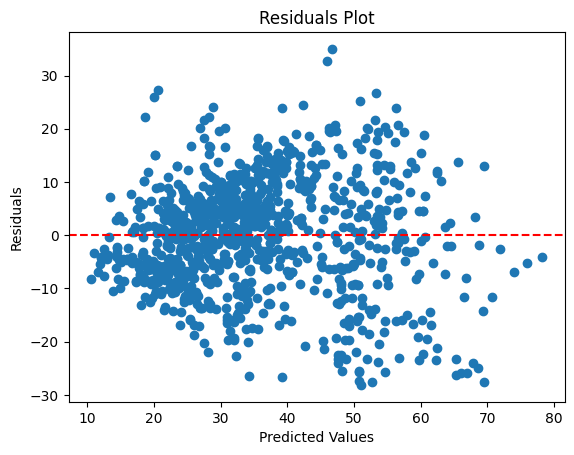

In [72]:
residuals=Y-y_pred

plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

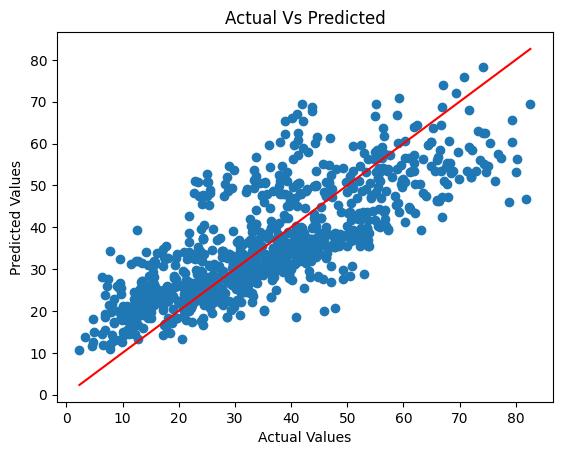

In [73]:
plt.scatter(Y,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Vs Predicted")
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],color='red')
plt.show()

Implmentation using gradient descent

In [74]:
def cost(X, Y, beta):
    m = X.shape[0]
    h = X @ beta
    J = (1 / (2 * m)) * ((h - Y).T @ (h - Y)).item()
    return J


In [90]:
def gradient_descent(X, Y, beta, alpha=0.0005, iter=5000):
    m = X.shape[0]                  # number of samples
    J = np.zeros(iter)             # to store cost at each iteration

    for i in range(iter):
        h = X @ beta               # hypothesis
        gradient = (1 / m) * (X.T @ (h - Y))
        #print(gradient.shape)
        beta = beta - alpha * gradient
        J[i] = cost(X, Y, beta)    # compute cost for current beta

    return beta, J


In [91]:
alpha=0.001
betaG=np.zeros((number_of_features,1))
#print(betaG.shape)
betaG,J=gradient_descent(X,Y,betaG)

print(betaG)



[[32.35865936]
 [ 6.35734469]
 [ 2.58321049]
 [-0.09891579]
 [-4.45954734]
 [ 3.74626918]
 [-1.50051742]
 [-2.65833071]
 [ 5.85224476]]


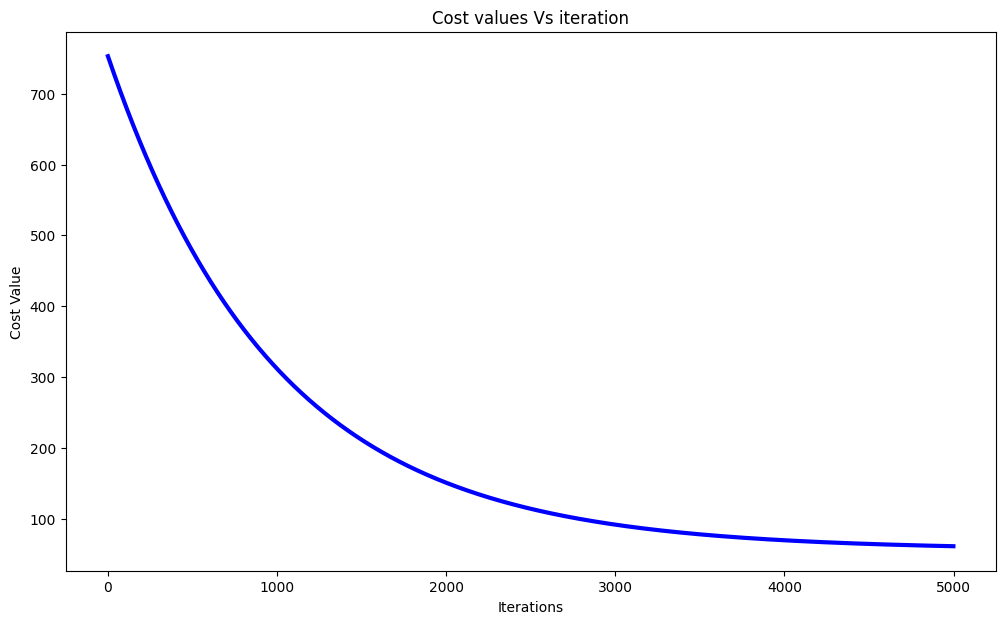

In [93]:
plt.figure(figsize=(12,7))
plt.plot(range(5000),J,color="blue",linewidth=3)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.title("Cost values Vs iteration")
plt.show()

In [94]:
print("Comparison of betas by various methods")
print("From Normal Equation", beta)
print("From Gradient Descent algo",betaG)


Comparison of betas by various methods
From Normal Equation [[35.25037811]
 [12.22743179]
 [ 8.56679804]
 [ 5.49497662]
 [-3.24722921]
 [ 1.68596792]
 [ 1.21567297]
 [ 1.47186672]
 [ 7.14605281]]
From Gradient Descent algo [[32.35865936]
 [ 6.35734469]
 [ 2.58321049]
 [-0.09891579]
 [-4.45954734]
 [ 3.74626918]
 [-1.50051742]
 [-2.65833071]
 [ 5.85224476]]
